In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv('/content/BostonHousing.csv')  # Replace with your dataset path

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [4]:
# Separate features (X) and target (y)
X = data.drop('medv', axis=1)  # Features
y = data['medv']  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (404, 13)
Test data shape: (102, 13)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 7.93
R-squared (R²): 0.89


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree MSE: {dt_mse:.2f}")
print(f"Decision Tree R²: {dt_r2:.2f}")


Linear Regression MSE: 24.29
Linear Regression R²: 0.67
Decision Tree MSE: 10.42
Decision Tree R²: 0.86


# Model Performance Summary

## Random Forest Regressor:

Mean Squared Error (MSE): 7.93

R-squared (R²): 0.89

Analysis: The Random Forest model performed best, achieving the lowest MSE and highest R². This indicates that the model captures the data's variance well and makes accurate predictions.

# Linear Regression:

Mean Squared Error (MSE): 24.29

R-squared (R²): 0.67

Analysis: Linear Regression performed significantly worse than Random Forest. The higher MSE and lower R² suggest that the linear model struggles to capture complex relationships in the data.

## Decision Tree Regressor:

Mean Squared Error (MSE): 10.42

R-squared (R²): 0.86

Analysis: The Decision Tree model performed reasonably well, but it still falls short of Random Forest. This is likely because a single decision tree can overfit the data, while Random Forest mitigates overfitting through ensemble learning.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score on Training Data: 0.8261134382273253
Tuned Random Forest MSE: 7.9271453333333355
Tuned Random Forest R²: 0.891903226702447

Feature Importances:
    Feature  Importance
5        rm    0.503845
12    lstat    0.309509
7       dis    0.060549
0      crim    0.038062
10  ptratio    0.016313
9       tax    0.015661
4       nox    0.015544
6       age    0.013840
11        b    0.012154
2     indus    0.007953
8       rad    0.003811
1        zn    0.001756
3      chas    0.001004


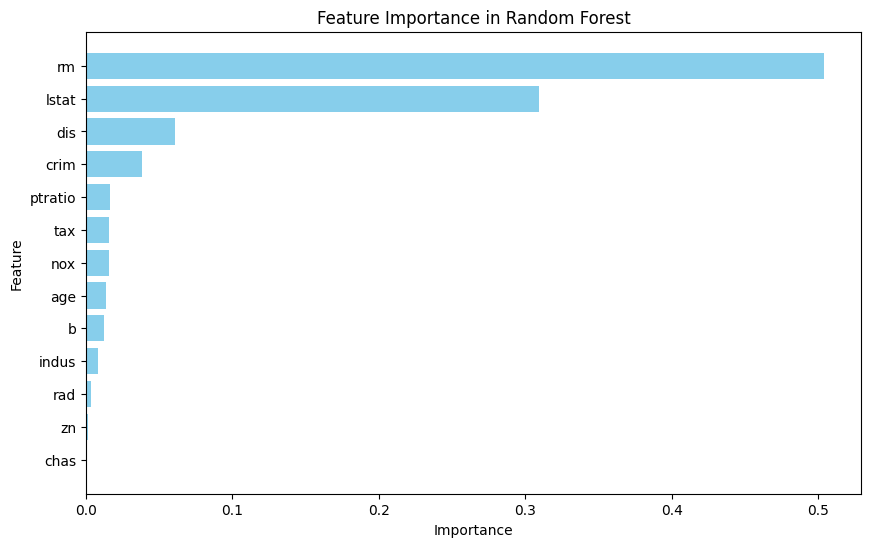

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on Training Data:", grid_search.best_score_)

# Use the best model from Grid Search
best_rf = grid_search.best_estimator_

# Evaluate the best model on test data
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest MSE:", mse)
print("Tuned Random Forest R²:", r2)

# Feature importance analysis
importances = best_rf.feature_importances_
feature_names = data.columns[:-1]  # Exclude target variable ('medv')

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [8]:
import joblib

# Save the model
model_filename = "random_forest_model.pkl"
joblib.dump(best_rf, model_filename)
print(f"Model saved as {model_filename}")


Model saved as random_forest_model.pkl


In [49]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create a simple dataset with a correct configuration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Train a model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X, y)

# Create a function to make predictions
def predict_model(features):
    # Convert the input features to a numpy array and reshape if needed
    features = np.array(features).reshape(1, -1)  # Reshape for a single prediction
    prediction = model.predict(features)  # Predict
    return prediction[0]  # Return the prediction

# Example usage
input_data = [1.5, -2.5]  # Example features for prediction
output = predict_model(input_data)
print(f"Prediction: {output}")


Prediction: 1


In [26]:
from flask import Flask, request, jsonify, render_template
import numpy as np
import pickle

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Home route
@app.route('/')
def index():
    return render_template('index.html')

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # Get input values from the form
    float_features = [float(x) for x in request.form.values()]
    scaled_features = scaler.transform([float_features])  # Scale input features
    prediction = model.predict(scaled_features)
    
    return render_template('index.html', predicted_text=f'Predicted House Price: ${prediction[0]:.2f}')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-2023.09/lib/python3.11/si

SystemExit: 1

/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
